----
# Laboratorium 8 - Kodowanie predykcyjne
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej  

----
## 0. Zagadnienia do opanowania przed zajęciami
----
0.1. Obsługa języka Python oraz bibliotek `numpy` oraz `matplotlib`.  
0.2. Metody kodowania entropijnego / o zmiennej długości słowa  
0.3  Kwantyzacja  
0.4  Kodowanie predykcyjne  
0.5. Analiza histogramu i prawdopodobieństw występowania symboli w strumieniu  

Literatura:
- M. Domański, Obraz cyfrowy, Wydawnictwo  WKŁ, Warszawa 2011
- D. Karwowski: Zrozumieć kompresję, Poznań 2019

## UWAGA ##
Przed przystąpieniem do ćwiczenia prosze się upewnić, aby w lokalizacji pliku .ipynb (z instrukcją) znajdowały się równiez pliki:
* xPredictiveCoding.py
* xHuffman.py
* xPSNR.py

In [5]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import imageio
import math 

import xPredictiveCoding
import xHuffman
import xPSNR

### Zadanie A 

Wczytaj obrazy lena.png i boats.png oraz napisz funkcję wyświetlającą te obrazy oraz ich histogramy (obszar wyświetlony podzielony na 4 częsci):  
- `imageio.imread()`,  
- `matplotlib.pyplot.subplots()`,  
- `matplotlib.pyplot.hist()`,  
- `matplotlib.pyplot.imshow()`  

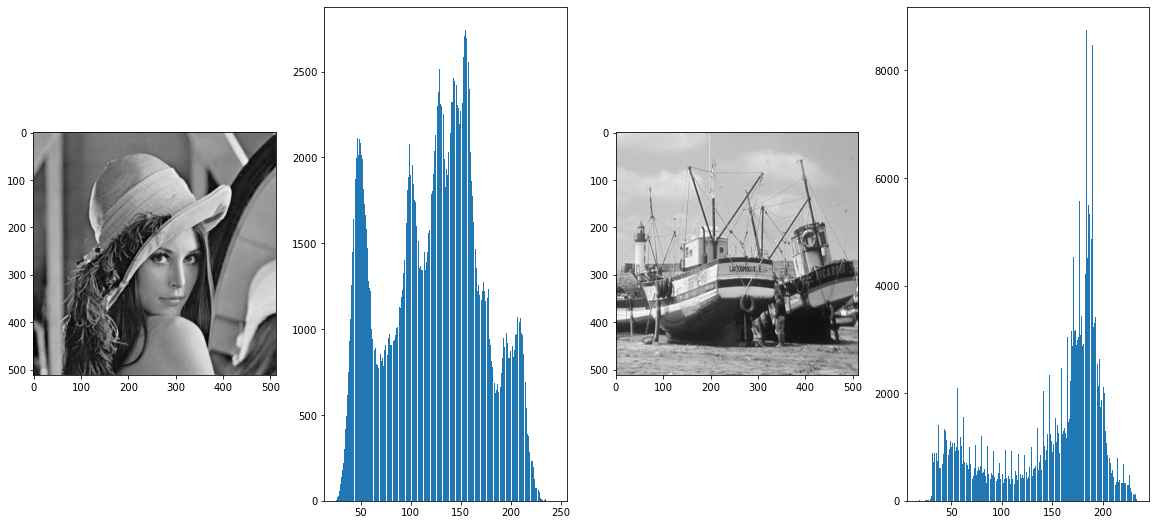

In [27]:
lena  = imageio.imread("lena.png")
boats = imageio.imread("boats.png")

def dispImagesWithHistograms(image1,image2):
  fig = plt.figure(figsize=(20, 20))
  plt.subplot(2,4,1)
  plt.imshow(image1, cmap="gray")
  plt.subplot(2,4,2)
  plt.hist(np.ravel(lena), 255)
  plt.subplot(2,4,3)
  plt.imshow(image2, cmap="gray")
  plt.subplot(2,4,4)
  plt.hist(np.ravel(boats), 255)
  return

dispImagesWithHistograms(lena, boats)

### Zadanie B  
Dokonać bezpośredniego zakodowania ww. obrazów kodem Huffmana(`xHuffman.HuffmanCodeBits()`). Obliczyć i zanotować stopień kompresji oraz wnioski odnośnie stopnia kompresji uzyskiwanego przy bezpośrednim kodowaniu entropijnym.   

#### Wskazówka
Użyj funkcji `help(xHuffman.HuffmanCodeBits)` aby otrzymać opis działania funkcji. W kolejnych przykłądach zastąp argument (w nawiasie) nazwami innych funkcji aby znaleźć ich opis.

In [16]:
help(xHuffman.HuffmanCodeBits)

# lena
bits_per_sample = xHuffman.HuffmanCodeBits(lena)
print('bits-per-sample lena : {0:f}'.format(bits_per_sample))
# boats
bits_per_sample = bits_per_sample = xHuffman.HuffmanCodeBits(boats)
print('bits-per-sample boats: {0:f}'.format(bits_per_sample))

Help on function HuffmanCodeBits in module xHuffman:

HuffmanCodeBits(ImgData)
    Huffman coding - calculates the average number of bits per symbol (sample)
    
    Usage:
    BitsPerSample = HuffmanCodeBits (ImgData)
    
    Variables description:
    ImgData       : vector/array of samples to be encoded
    BitsPerSample : average number of bits per symbol (sample)
    
    Kodowanie Huffmana
    
    Sposób użycia:
    BitsPerSample = HuffmanCodeBits(ImgData)
    
    Variables description:
    ImgData       : wektor/macierz próbek do zakodowania
    BitsPerSample : średnia liczba bitów na symbol

bits-per-sample lena : 7.467224
bits-per-sample boats: 7.113842


----

Help on module xPredictiveCoding:

NAME
    xPredictiveCoding

FUNCTIONS
    InvScale(Value, Nbits, Range)
    
    NonUniInvScale(Value, Nbits, Range, Mu)
    
    NonUniQuantScale(Value, Nbits, Range, Mu)
    
    PredCode(ImgOrg, PredType, QuantBits=None, NonUniformity=None)
        PredErr, ImgErr = PredCode(ImgOrg, PredType, QuantBits=None, NonUniformity=False)
        The function calculates linear prediction error
        Moreover prediction error can be quantized using uniform or nonuniform quantizer
        with different number of quantization levels
        
        Usage examples :
        PredErr, ImgErr = PredCode(ImgOrg, PredType)
        PredErr, ImgErr = PredCode(ImgOrg, PredType, QuantBits)
        PredErr, ImgErr = PredCode(ImgOrg, PredType, QuantBits, NonUniformity)
        
        Variables description:
        ImgOrg        : pixel array
        PredType      : 1 - one-point predictor (left)
                        2 - one-point predictor (above)
                

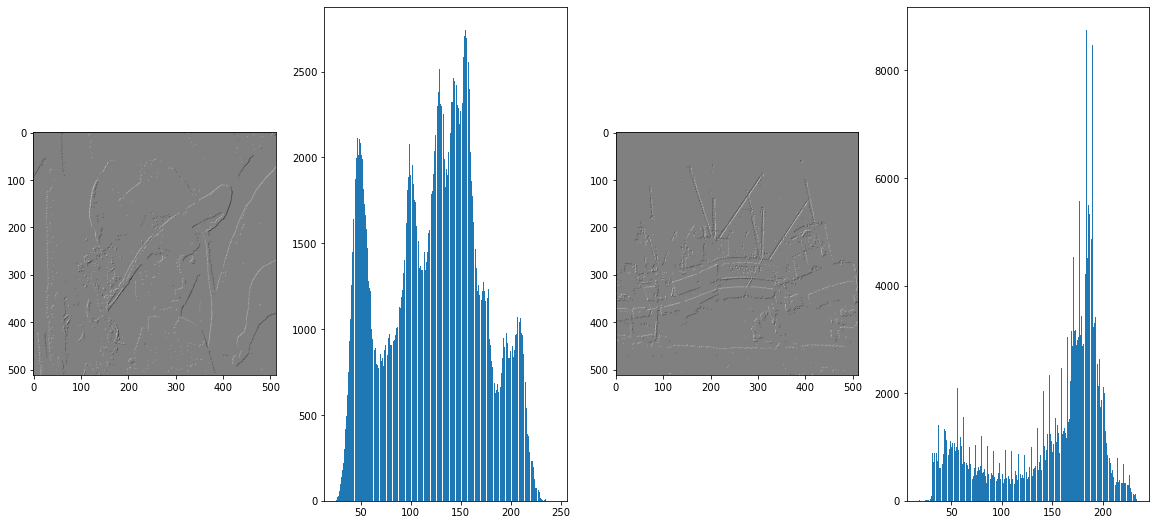

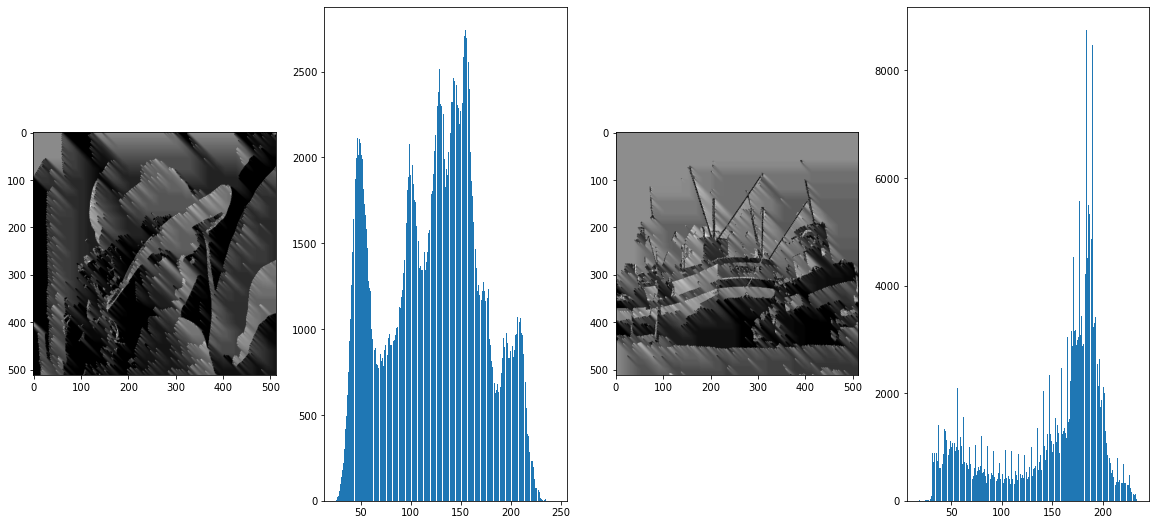

In [76]:
#Blok kodu 1
help(xPredictiveCoding)
qantizator = 2 
#kwantowanie z błędem predykcji 1 i kwantyzoatorem 
# wyznacz błąd predykcji
Lena_pred, ImgErr = xPredictiveCoding.PredCode(lena, 3, qantizator)
Boats_pred, ImgErr = xPredictiveCoding.PredCode(boats, 3,qantizator)
dispImagesWithHistograms(Lena_pred, Boats_pred)
# rekonstrukcja obrazu
Lena_decode = xPredictiveCoding.PredDecode(Lena_pred, 3, qantizator)
Boats_decode = xPredictiveCoding.PredDecode(Boats_pred, 3, qantizator)
dispImagesWithHistograms(Lena_decode, Boats_decode)




In [74]:
#Blok kodu 2


# lena
bits_per_sample = xHuffman.HuffmanCodeBits(Lena_pred)
print('bits-per-sample lena : {0:f}'.format(bits_per_sample))
# boats
bits_per_sample = bits_per_sample = xHuffman.HuffmanCodeBits(Boats_pred)
print('bits-per-sample boats: {0:f}'.format(bits_per_sample))

bits-per-sample lena : 1.420563
bits-per-sample boats: 1.592472


In [75]:
#Blok kodu 3

#for lena
lena_psnr  = xPSNR.PSNR(lena, Lena_decode)
print('PSNR for lena and reconstuction is: %f'%(lena_psnr))
boats_psnr  = xPSNR.PSNR(boats, Boats_decode)
print('PSNR for lena and reconstuction is: %f'%(boats_psnr))

PSNR for lena and reconstuction is: 29.003541
PSNR for lena and reconstuction is: 29.205672


### Zadanie C
Za pomocą funkcji `xPredictiveCoding.PredCode()` wyznaczyć błąd predykcji obrazów lena.png i boats.pgm z użyciem predyktora jednopunktowego. Obejrzeć obrazy błędu predykcji oraz histogramy błędu predykcji. Za pomocą funkcji `xPredictiveCoding.PredDecode()` zrekonstruować obraz.  
  
Operacje wykonaj w `#blok kodu 1`

### Zadanie D
Zakodować koderem Huffmana obrazy błędu predykcji (`xPredictiveCoding.HuffmanCodeBits()`). Obliczyć i zanotować stopień kompresji oraz wnioski z porównania efektywności kodowania bezstratnego błędu predykcji z efektywnością kodowania bezpośredniego. Obejrzeć zrekonstruowane obrazy i sprawdzić jakość rekonstrukcji za pomocą polecenia `np.array_equal()`.  
  
Operacje wykonaj w `#blok kodu 2`

### Zadanie E
Powtórz procedurę z zadań C i D dla predyktora 3-punktowego. 

(zmodyfikuj wejścia funkcji w blokach kodu 1 i 2)

### Zadanie F
Za pomocą funkcji `xPredictiveCoding.Predcode()` wygenerować błąd predykcji obrazu lena.pgm z użyciem predyktora trzypunktowego, dokonując zarazem kwantowania błędu predykcjina 64, 32, 16 i 8 poziomach (argument `nbits` - pamiętaj aby podać w bitach!!) ,zachowując wyniki każdego kodowania. Wyznaczyć histogramy obrazów błędu predykcji. Następnie, z użyciem funkcji `xPredictiveCoding.Preddecode()` zrekonstruować obraz. Obejrzeć zrekonstruowane obrazy i sprawdzić jakość rekonstrukcji za pomocą polecenia `xPredictiveCoding.PSNR()`. Zanotować wyliczone wartości.

Wykreślić krzywe zależności wartości PSNR od średniej liczby bitów na punkt obrazu (blok kodu 2)). Opisać charakter obserwowanych zniekształceń
  
Wykorzystaj bloki kodu 1 i 2. Obliczenia PSNR wykonaj w `#blok kodu 3`

### Zadanie G
Dla obrazu boats.png przeanalizować wpływ rodzaju predyktora (1-i 3-punktowego)na: 
- a) stopień kompresji bezstratnej (tj. takiej, w której nie zastosowano kwantowania błędu predykcji)
- b) jakość obrazu poddanego kompresji stratnej (w tym celu dobrać każdorazowo liczbę poziomów kwantowania w celu uzyskania możliwie jednakowego stopnia kompresji)

### Zadanie H
Powtórzyć eksperymenty z punktu G stosując predyktor trzypunktowy oraz kwantowanie nierównomierne (z użyciem angumentu `qnu` - `xPredictiveCoding.Predcode()` i `xPredictiveCoding.Preddecode()`). Obejrzeć histogramy błędu predykcji i porównać je do histogramów z punktu G. Wyjaśnić przyczynę innego stopnia kompresji uzyskiwanego przy zastosowaniu kodera Huffmana. Dla wybranej wartości parametru qnudobrać liczbę poziomów kwantowania w celu uzyskania podobnych stopni kompresji, jak w punkcie G

### Zadanie I
Porównać zrekonstruowane obrazy z obrazami z punktu G. Wyznaczyć wartości PSNR i wykreślić krzywą zależności PSNR od średniej liczby bitów na punkt obrazu. Skomentować znaczenie kwantowania nierównomiernego